# Model based learning
## Data:
- Better life index - OECD
- GDP per capita - IMF
Keep only GDP per capita and Life satisfaction. Is there a relation between money and how happy people are? Answer with a very simple model based learning.


In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn.linear_model

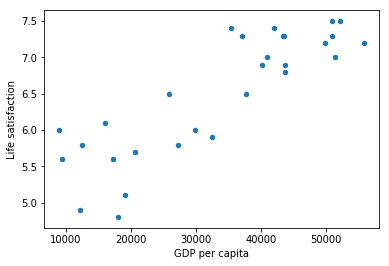

In [3]:
#Load the data
only_gdp = pd.read_csv('../gdp.csv')    


X = np.c_[only_gdp["GDP per capita"]]
y = np.c_[only_gdp["Life satisfaction"]]

# Visualize the data
only_gdp.plot(kind='scatter', x="GDP per capita", y='Life satisfaction')
plt.show()

In [4]:
#see the data
only_gdp.head()

,Country,GDP per capita,Life satisfaction
0,Russia,9054.914,6.0
1,Turkey,9437.372,5.6
2,Hungary,12239.894,4.9
3,Poland,12495.334,5.8
4,Slovak Republic,15991.736,6.1


### Model selection
It looks like life satisfaction goes up more or less linearly as the contry's GDP per capita. Therefore, we could model life satisfaction as a linear function of GDP per capita.

$life\_satisfaction = \theta_0+ \theta_1 * GDP\_per\_capita$


In [5]:
# Select a linear model
model = sklearn.linear_model.LinearRegression()

### Train the model

In [6]:
# Train the model
model.fit(X, y)

# Make a prediction for Cyprus
X_new = [[22587]]  # Cyprus' GDP per capita
print(model.predict(X_new)) # outputs [[ 5.96242338]]

[[5.96242338]]


In [7]:
#get the model's parameters 
t0, t1 = model.intercept_[0], model.coef_[0][0]
t0, t1

(4.853052800266436, 4.911544589158482e-05)

In [8]:
#Check the value for the linear case
s = t0+ t1 *8956  # Romania 2015
s

5.2929307336714695

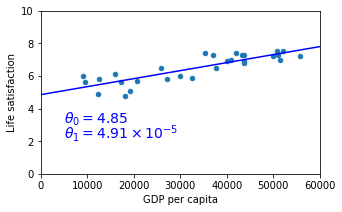

In [9]:
only_gdp.plot(kind='scatter', x="GDP per capita", y='Life satisfaction', figsize=(5,3))
plt.axis([0, 60000, 0, 10])
XX=np.linspace(0, 60000, 1000)
plt.plot(XX, t0 + t1*XX, "b")
plt.text(5000, 3.1, r"$\theta_0 = 4.85$", fontsize=14, color="b")
plt.text(5000, 2.2, r"$\theta_1 = 4.91 \times 10^{-5}$", fontsize=14, color="b")

#plt.plot(X, 8 - 5*X/100000, "g")
#plt.text(5000, 9.1, r"$\theta_0 = 8$", fontsize=14, color="g")
#plt.text(5000, 8.2, r"$\theta_1 = -5 \times 10^{-5}$", fontsize=14, color="g")
plt.show()